In [1]:
import numpy as np
from PIL import Image
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.losses import *
from tensorflow.keras.regularizers import *
from tensorflow.keras.initializers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.datasets import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.preprocessing.text import * # new
from tensorflow.keras.preprocessing.sequence import * #new
#import tensorflow_datasets as tfds

Take into account the order of a sentence. requires special NN architecture - sequence models: RNNs, LSTMs.
LSTMs allow long term information to be passed, this is beacuse as well as the activation induced by the previous word, cell state transmission allows long term dependencies to be memorized for when they are important. 

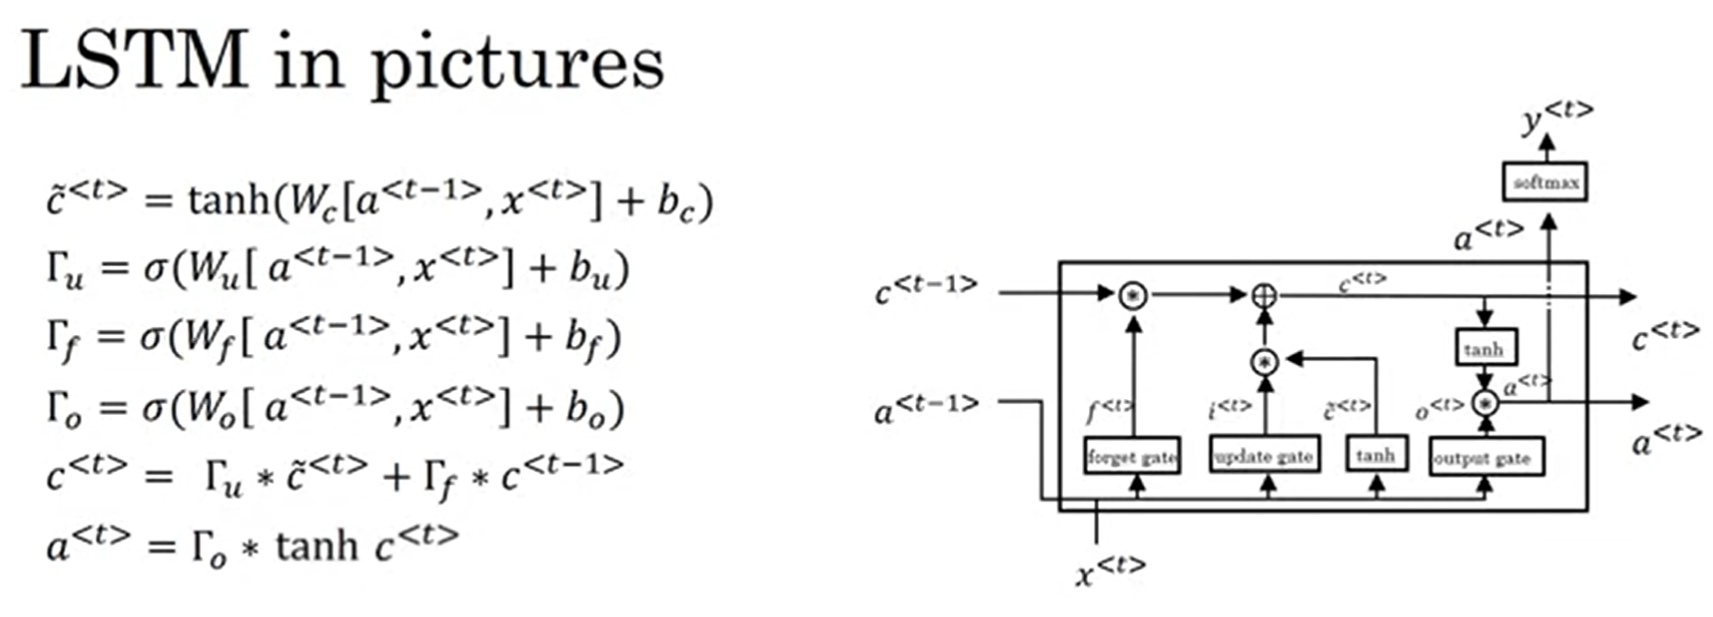

In [2]:
Image.open(r'C:\Users\44788/Desktop\it3.png')

In [10]:
file = r'C:\Users\44788\Desktop\OctaveML\Sarcasm_Headlines_Dataset.json'
import json 
import json
data = [json.loads(line) for line in open(file, 'r')]
sentences = []
labels = []
urls = []
for item in data:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])
    
vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length,truncating=trunc_type, padding=padding_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length,truncating=trunc_type, padding=padding_type)

# with 2 LSTM layers
model1 = Sequential([
    Embedding(vocab_size, 64),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')])

# with 1 LSTM layer
model2 = Sequential([
    Embedding(vocab_size, 64),
    Bidirectional(LSTM(32)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')])

In [4]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          640000    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 751,489
Trainable params: 751,489
Non-trainable params: 0
_________________________________________________________________


In [5]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

training_labels = np.array(training_labels).astype(int)
training_padded = training_padded.astype(int)
testing_labels = np.array(testing_labels).astype(int)
testing_padded = testing_padded.astype(int)

num_epochs=10
history1 = model1.fit(training_padded,
         training_labels,
         epochs=num_epochs,
         validation_data=(testing_padded, testing_labels),
                   verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

<AxesSubplot:>

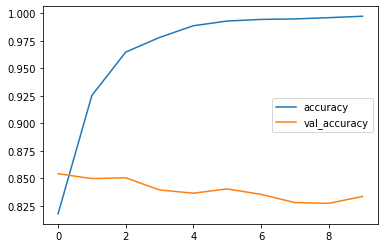

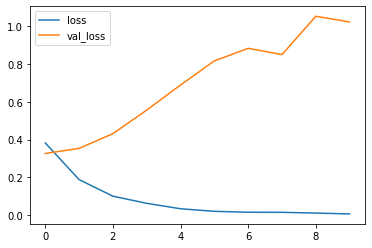

In [13]:
df = pd.DataFrame(history1.history)
df.plot(y=['accuracy', 'val_accuracy'])
df.plot(y=['loss', 'val_loss'])

In [11]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

training_labels = np.array(training_labels).astype(int)
training_padded = training_padded.astype(int)
testing_labels = np.array(testing_labels).astype(int)
testing_padded = testing_padded.astype(int)

num_epochs=30
history2 = model2.fit(training_padded,
         training_labels,
         epochs=num_epochs,
         validation_data=(testing_padded, testing_labels),
                   verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

<AxesSubplot:>

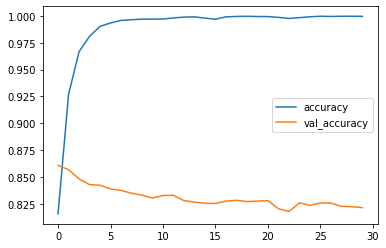

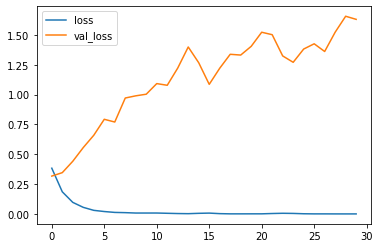

In [12]:
df = pd.DataFrame(history2.history)
df.plot(y=['accuracy', 'val_accuracy'])
df.plot(y=['loss', 'val_loss'])
# with one layer over a larger time scale there is liely to be 
# a greater degree of irregularities in the improvements
# often means the model needs to be imporved

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

<AxesSubplot:>

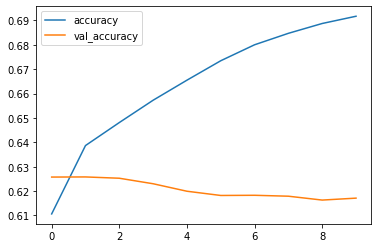

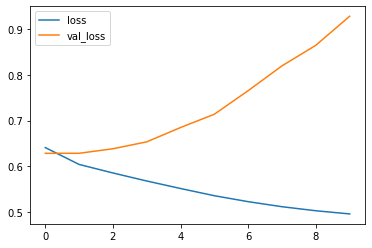

In [16]:
model3 = Sequential([
    Embedding(vocab_size, 64),
    Conv1D(128, 5, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')])

model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


num_epochs=10
history3 = model3.fit(training_padded,
         training_labels,
         epochs=num_epochs,
         validation_data=(testing_padded, testing_labels),
                   verbose=0)

df = pd.DataFrame(history3.history)
df.plot(y=['accuracy', 'val_accuracy'])
df.plot(y=['loss', 'val_loss'])